## PENYIMPAN DATA GAMBAR

In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


## 1.1 Penyimpan direktori dan Data

In [26]:
images_path = "D:/Data Set"
train_path = "./train"
val_path = "./validation"
test_path = "./test"

In [27]:
subdirectories = [f.name for f in os.scandir(images_path+train_path) if f.is_dir()]

print("Daftar nama subdirektori:")
for subdir in subdirectories:
    print(subdir)

Daftar nama subdirektori:
Bengkak Gusi
Bukan Gambar Gigi
Gigi Berlubang
Gigi Sehat
Plak Gigi


In [28]:
# fungsi untuk menampilkan contoh gambar secara acak
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    target_dir = images_path + "/" + data_dir + "/" + class_dir + "/"

    rand_images = random.sample(os.listdir(target_dir), 4)

    fig, axs = plt.subplots(n_row, n_col)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

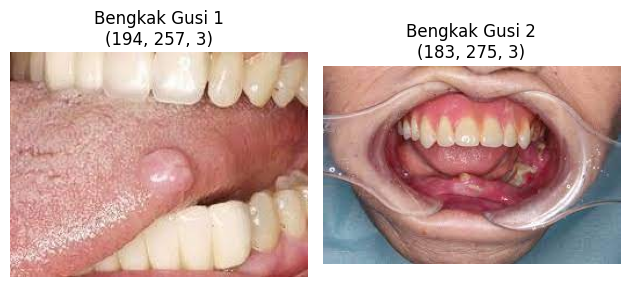

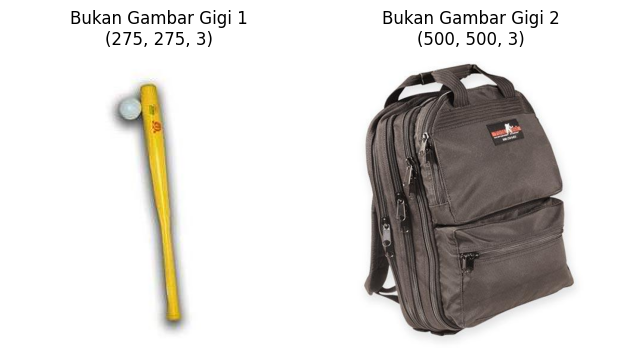

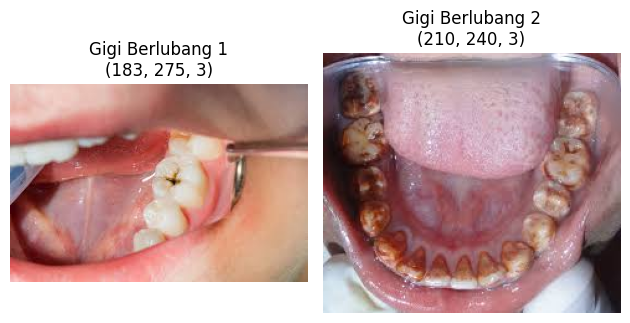

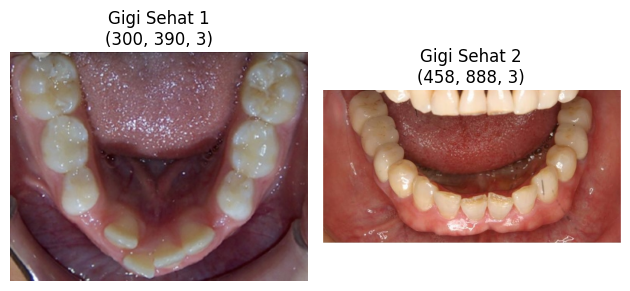

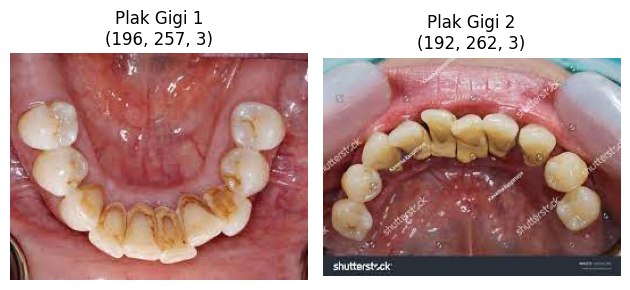

In [29]:
# contoh menampilkan gambar secara acak
view_random_image("train", "Bengkak Gusi", 1, 2)
view_random_image("train", "Bukan Gambar Gigi", 1, 2)
view_random_image("train", "Gigi Berlubang", 1, 2)
view_random_image("train", "Gigi Sehat", 1, 2)
view_random_image("train", "Plak Gigi", 1, 2)

## 1.2 Image Data Generator

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
tf.random.set_seed(42)

# pengaturan data training dengan scaling images saja
# train_datagen = ImageDataGenerator(rescale=1.0 / 255)

# pengaturan data training dengan berbagai augmentasi
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# pengaturan data validasi selama pelatihan
val_datagen = ImageDataGenerator(rescale=1./255)

# pengaturan data uji untuk evaluasi model
test_datagen = ImageDataGenerator(rescale=1./255)

# menentukan ukuran gambar untuk proses pelatihan
img_size = (224, 224)

# menyiapkan data training dengan pengaturan yang sudah ditentukan
train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical', 
                                               seed=42)     

 # menyiapkan data validasi
val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)
 
# menyiapkan data uji
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 1470 images belonging to 5 classes.
Found 316 images belonging to 5 classes.
Found 317 images belonging to 5 classes.


## Model CNN

## 2.1 Membuat Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [33]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(5, activation="softmax"))  # Adjust to match number of classes

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Assuming train_data and val_data are preprocessed and ready
history_1 = model_1.fit(
        train_data,
        validation_data=val_data,
        epochs=100,
)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 787ms/step - accuracy: 0.3383 - loss: 1.5404 - val_accuracy: 0.4241 - val_loss: 1.2924
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 776ms/step - accuracy: 0.4919 - loss: 1.1100 - val_accuracy: 0.5633 - val_loss: 1.1584
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.5157 - loss: 1.0889 - val_accuracy: 0.5443 - val_loss: 1.1081
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 733ms/step - accuracy: 0.5952 - loss: 0.9691 - val_accuracy: 0.6392 - val_loss: 1.0018
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 733ms/step - accuracy: 0.5959 - loss: 0.9623 - val_accuracy: 0.5443 - val_loss: 1.1157
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 739ms/step - accuracy: 0.5534 - loss: 0.9890 - val_accuracy: 0.6044 - val_loss: 1.0439
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 873ms/step - accuracy: 0.6238 - loss: 0.9146 - val_accuracy: 0.6361 - val_loss: 0.9389
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 797ms/step - accuracy: 0.6399 - loss: 0.8875 - val_accuracy

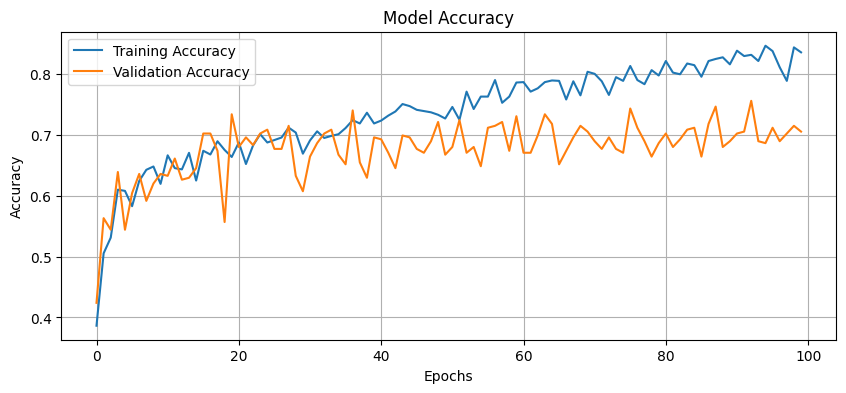

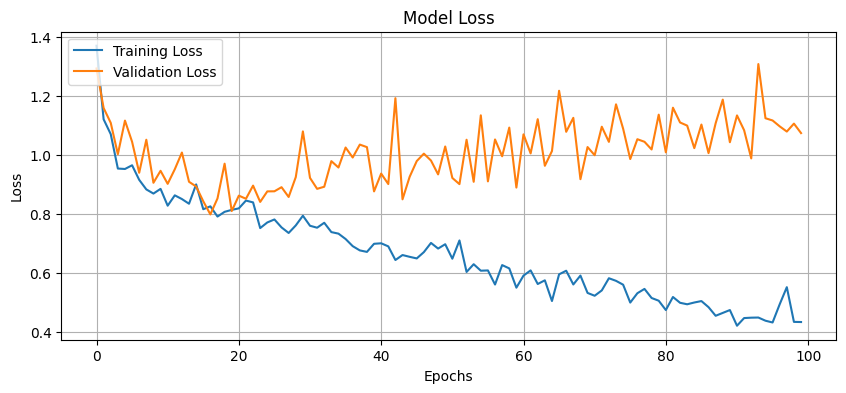

In [34]:
import matplotlib.pyplot as plt

# Membuat plot akurasi model
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Membuat plot loss model
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## 2.2 Menyimpan dan Memuat Model

In [35]:
from tensorflow.keras.models import load_model

model_1.save("model_10_epochs.keras")

In [36]:
my_model_1 = load_model("model_10_epochs.keras")

## 2.3 Evaluasi dan Prediksi

In [37]:
model_1.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7859 - loss: 0.8071


[1.0660851001739502, 0.7223974466323853]

In [38]:
predictions = model_1.predict(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


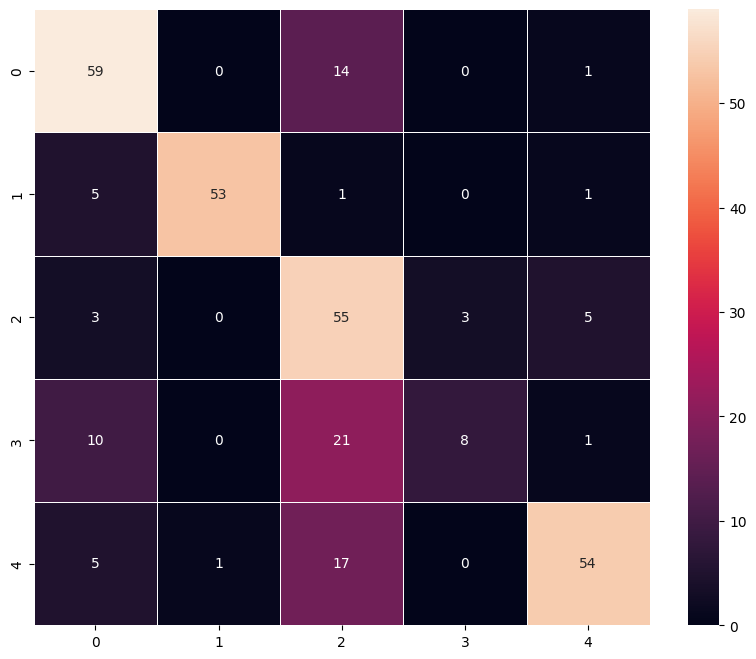

In [39]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()

## MEMBUAT MODEL (DENGAN PRETRAINED MODEL)

## 3.1 Model CNN dengan Model Dasar VGG16

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [41]:
# Membuat base model menggunakan VGG16 pre-trained weights
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Membuat model CNN
model_2 = Sequential()

# Menambahkan base model ke model CNN
model_2.add(base_model)

# Menambahkan layer dense untuk klasifikasi
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(5, activation='softmax'))

# Membekukan parameter pada base model
base_model.trainable = False

# Compile model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melihat ringkasan model
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [42]:
# Fit the model
history_2 = model_2.fit(
        train_data,
        validation_data=val_data,
        epochs=30,
)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.3598 - loss: 3.6508 - val_accuracy: 0.5601 - val_loss: 1.1702
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6492 - loss: 0.9050 - val_accuracy: 0.5316 - val_loss: 1.0584
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.6763 - loss: 0.7880 - val_accuracy: 0.6487 - val_loss: 0.9119
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6826 - loss: 0.8158 - val_accuracy: 0.6899 - val_loss: 0.8050
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7594 - loss: 0.6433 - val_accuracy: 0.6646 - val_loss: 0.8423
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7696 - loss: 0.5978 - val_accuracy: 0.7057 - val_loss: 0.7443
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7721 - loss: 0.5651 - val_accuracy: 0.7342 - val_loss: 0.7227
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7965 - loss: 0.5450 - val_accuracy: 0.7532 - v

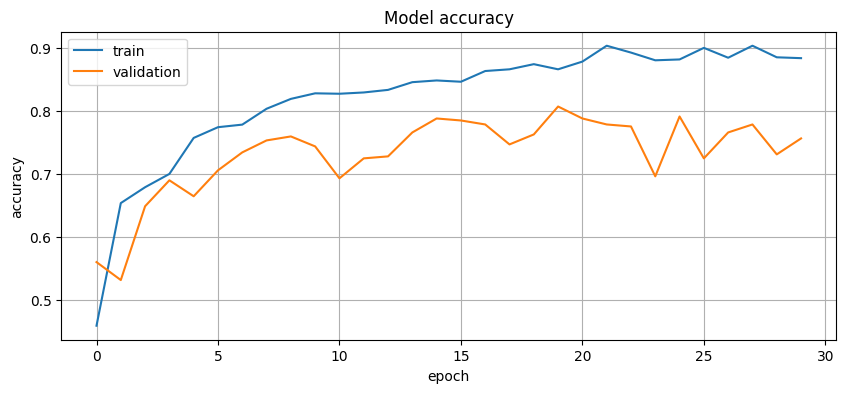

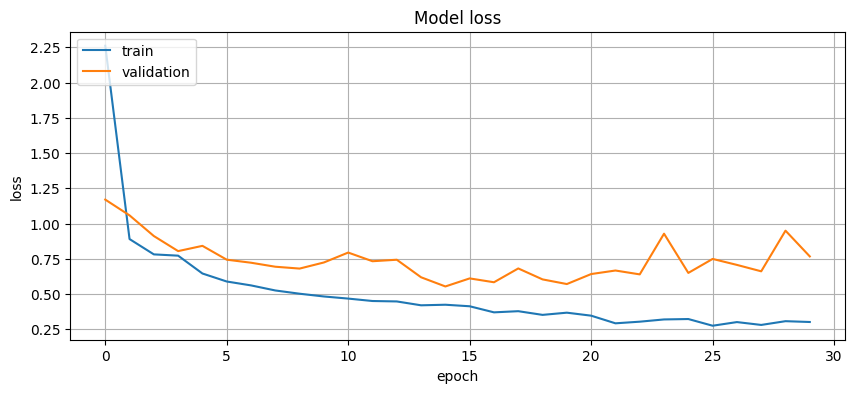

In [43]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10, 4))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10, 4))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

In [44]:
# menyimpan model hasil pelatihan
model_2.save("model_with_vgg16.keras")

In [45]:
from tensorflow.keras.models import load_model
# memuat model hasil pelatihan
my_model_2 = load_model("model_with_vgg16.keras")

## 3.3 Evaluasi dan Prediksi

In [46]:
my_model_2.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8385 - loss: 0.4691


[0.5992410182952881, 0.8138801455497742]

10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step


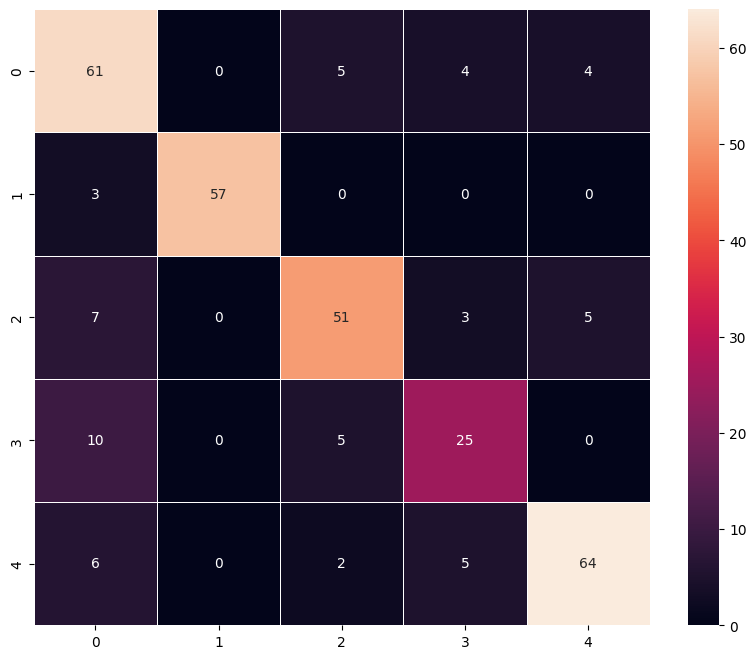

In [47]:
predictions = my_model_2.predict(test_data)
# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()